In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.validation import column_or_1d
import seaborn as sns
from tqdm import tqdm
from time import time

import matplotlib.pyplot as plt
%matplotlib inline 
pd.options.display.max_columns = 1000

In [2]:
# Reading in the crime data csv file and converting to a dataframe
crime_df = pd.read_csv('../Crimes_2001_into_2018_Cleaned.csv')

In [3]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6726512 entries, 0 to 6726511
Data columns (total 37 columns):
ID                                           int64
Date                                         object
Year                                         int64
Block                                        object
Primary Type                                 object
Location Description                         object
Domestic                                     bool
Beat                                         int64
District                                     float64
Ward                                         float64
Community                                    float64
X Coordinate                                 float64
Y Coordinate                                 float64
Latitude                                     float64
Longitude                                    float64
Month                                        int64
Season                                       object
Qu

In [4]:
crime_df.head()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Distance from Chicago (km),Closest Police Station (District),Distance from Closest Police Station (km),Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km)
0,757,2001-04-12 21:32:00,2001,056XX S NORMAL AV,HOMICIDE,STREET,False,711,7.0,20.0,68.0,1173875.0,1867697.0,41.792370,-87.637960,4,SPRING,Q2,THURSDAY,WEEKDAY,EVENING,12,21,T2,S NORMAL AV,No Holiday,False,10.02,2.0,1.22,Garfield,Red Line,0.66,Garfield & Normal,0.19,ATSHAN FOOD & LIQUOR INC.,0.24
1,808,2001-05-06 01:30:00,2001,020XX W 55 ST,HOMICIDE,AUTO,False,915,9.0,NaN,NaN,NaN,NaN,NaN,NaN,5,SPRING,Q2,SUNDAY,WEEKEND,OVERNIGHT,6,1,T1,W 55 ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8389450,2008-04-15 15:00:00,2008,081XX W CATHERINE AVE,THEFT,RESIDENCE,True,1611,16.0,41.0,10.0,1120943.0,1934726.0,41.977319,-87.830619,4,SPRING,Q2,TUESDAY,WEEKDAY,AFTERNOON,15,15,T2,W CATHERINE AVE,No Holiday,False,20.18,16.0,5.34,Cumberland,Blue Line,0.98,Cumberland & Catherine,0.49,"MARIO'S WINE & SPIRITS, INC",0.51
3,937,2001-07-15 00:34:00,2001,030XX S HARDING ST,HOMICIDE,STREET,False,1031,10.0,NaN,NaN,NaN,NaN,NaN,NaN,7,SUMMER,Q3,SUNDAY,WEEKEND,OVERNIGHT,15,0,T2,S HARDING ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,983,2001-07-29 10:15:00,2001,011XX N LASALLE ST,HOMICIDE,ALLEY,False,1824,18.0,NaN,NaN,NaN,NaN,NaN,NaN,7,SUMMER,Q3,SUNDAY,WEEKEND,MORNING,29,10,T3,N LASALLE ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Getting counts of each primary type of crime
counts = crime_df['Primary Type'].value_counts()
counts

THEFT                                1412991
BATTERY                              1228590
CRIMINAL DAMAGE                       769380
NARCOTICS                             709729
OTHER OFFENSE                         417205
ASSAULT                               416975
BURGLARY                              387093
MOTOR VEHICLE THEFT                   313488
DECEPTIVE PRACTICE                    260930
ROBBERY                               254886
CRIMINAL TRESPASS                     192878
WEAPONS VIOLATION                      70274
PROSTITUTION                           68257
PUBLIC PEACE VIOLATION                 47671
OFFENSE INVOLVING CHILDREN             45138
CRIM SEXUAL ASSAULT                    26932
SEX OFFENSE                            24971
INTERFERENCE WITH PUBLIC OFFICER       15055
GAMBLING                               14410
LIQUOR LAW VIOLATION                   14036
ARSON                                  11122
HOMICIDE                                9170
KIDNAPPING

In [6]:
# Creating a dataframe of the primary type counts
df = counts.rename_axis('Primary Type').reset_index(name='counts')
df

,Primary Type,counts
0,THEFT,1412991
1,BATTERY,1228590
2,CRIMINAL DAMAGE,769380
3,NARCOTICS,709729
4,OTHER OFFENSE,417205
5,ASSAULT,416975
6,BURGLARY,387093
7,MOTOR VEHICLE THEFT,313488
8,DECEPTIVE PRACTICE,260930
9,ROBBERY,254886


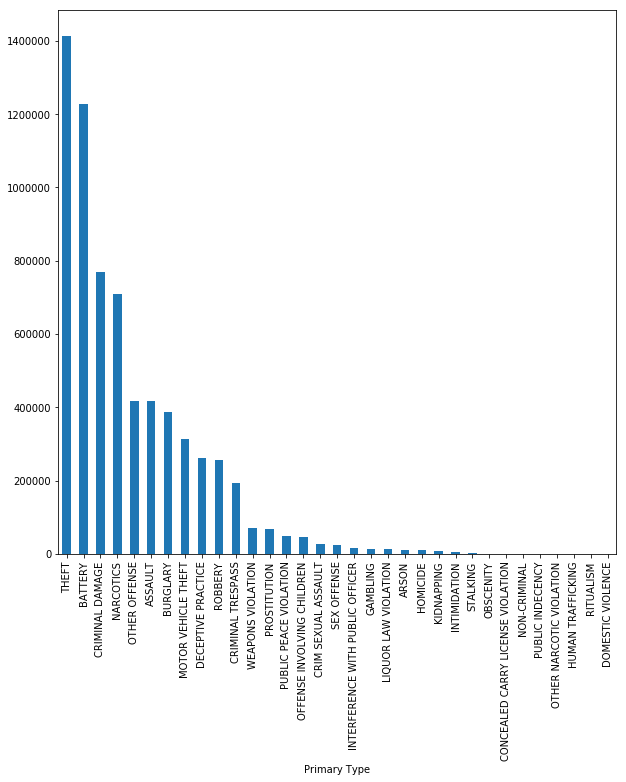

In [7]:
# Plotting the number of crimes by primary type
df.plot.bar(x = 'Primary Type', legend = None, figsize = (10,10))

In [8]:
# Only using data for the top 11 primary types of crimes
crime_df = crime_df[[each in ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS'] for each in crime_df['Primary Type']]]

In [9]:
len(crime_df)

6364145

In [10]:
# Deleting unneeded columns
del crime_df['Date']
del crime_df['Block']
del crime_df['Street']

In [11]:
# Dropping null values
crime_df = crime_df.dropna()
len(crime_df)

6357103

In [12]:
# Adding columns
crime_df['Square Root of Distance from Closest Police Station (km)'] = np.sqrt(crime_df['Distance from Closest Police Station (km)'])
crime_df['Square Root of Distance from Closest Bus Stop (km)'] = np.sqrt(crime_df['Distance from Closest Bus Stop (km)'])
crime_df['Square Root of Distance from Closest Liquor Store (km)'] = np.sqrt(crime_df['Distance from Closest Liquor Store (km)'])

In [16]:
# Getting sample df
crime_sample_3mil = crime_df.sample(3000000, random_state=23)

## SETTING X AND Y

In [17]:
crime_df.head()

,ID,Year,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Holiday,Is Holiday,Distance from Chicago (km),Closest Police Station (District),Distance from Closest Police Station (km),Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km),Square Root of Distance from Closest Police Station (km),Square Root of Distance from Closest Bus Stop (km),Square Root of Distance from Closest Liquor Store (km)
2,8389450,2008,THEFT,RESIDENCE,True,1611,16.0,41.0,10.0,1120943.0,1934726.0,41.977319,-87.830619,4,SPRING,Q2,TUESDAY,WEEKDAY,AFTERNOON,15,15,T2,No Holiday,False,20.18,16.0,5.34,Cumberland,Blue Line,0.98,Cumberland & Catherine,0.49,"MARIO'S WINE & SPIRITS, INC",0.51,2.310844,0.700000,0.714143
5,1920659,2002,BATTERY,GROCERY FOOD STORE,False,512,5.0,9.0,49.0,1180290.0,1836704.0,41.707177,-87.615386,1,WINTER,Q1,TUESDAY,WEEKDAY,AFTERNOON,1,15,T1,New Year's Day,True,19.43,5.0,1.84,95th/Dan Ryan,Red Line,1.85,103rd Street & Calumet,0.03,"DOUBLE R FOOD & LIQUOR, INC.",0.64,1.356466,0.173205,0.800000
7,1920699,2002,BATTERY,RESIDENCE,False,513,5.0,34.0,49.0,1176352.0,1831284.0,41.692393,-87.629969,1,WINTER,Q1,WEDNESDAY,WEEKDAY,MORNING,2,10,T1,No Holiday,False,21.07,5.0,2.11,95th/Dan Ryan,Red Line,3.37,111th Street & Princeton,0.03,115TH ST FOOD & LIQUORS INC,0.88,1.452584,0.173205,0.938083
8,1921127,2002,ASSAULT,RESIDENCE,True,512,5.0,34.0,49.0,1176290.0,1834271.0,41.700591,-87.630107,1,WINTER,Q1,WEDNESDAY,WEEKDAY,AFTERNOON,2,15,T1,No Holiday,False,20.16,5.0,2.30,95th/Dan Ryan,Red Line,2.47,103rd Street & Princeton,0.72,"A & Q FOOD & LIQUOR, INC.",0.73,1.516575,0.848528,0.854400
9,1921304,2002,THEFT,GROCERY FOOD STORE,False,2212,22.0,19.0,75.0,1162749.0,1830916.0,41.691677,-87.679782,1,WINTER,Q1,WEDNESDAY,WEEKDAY,MORNING,2,10,T1,No Holiday,False,21.66,22.0,0.94,95th/Dan Ryan,Red Line,5.73,111th Street & Western,0.07,"R. & L. SEARS LIQUORS, INC.",0.91,0.969536,0.264575,0.953939


In [18]:
crime_df.columns

Index(['ID', 'Year', 'Primary Type', 'Location Description', 'Domestic',
       'Beat', 'District', 'Ward', 'Community', 'X Coordinate', 'Y Coordinate',
       'Latitude', 'Longitude', 'Month', 'Season', 'Quarter of Year',
       'Day of the Week', 'Day Type', 'Time of Day', 'Day', 'Hour',
       'Third of Month', 'Holiday', 'Is Holiday', 'Distance from Chicago (km)',
       'Closest Police Station (District)',
       'Distance from Closest Police Station (km)', 'Closest Train Stop',
       'Closest Train Line', 'Distance from Closest Train Stop (km)',
       'Closest Bus Stop', 'Distance from Closest Bus Stop (km)',
       'Closest Liquor Store', 'Distance from Closest Liquor Store (km)',
       'Square Root of Distance from Closest Police Station (km)',
       'Square Root of Distance from Closest Bus Stop (km)',
       'Square Root of Distance from Closest Liquor Store (km)'],
      dtype='object')

In [19]:
# Setting X and y 
columns = crime_df.columns

primary_cols = 'Primary Type'

other_cols = [c for c in columns if c.startswith(('Location Description', 
       'Beat', 'District', 'Ward', 'Community', 'X Coordinate', 'Y Coordinate', 
        'Latitude', 'Longitude', 'Month', 'Season', 'Quarter of Year',
       'Day of the Week', 'Day Type', 'Time of Day', 'Hour',
       'Holiday', 'Is Holiday', 'Closest Train Line', 'Distance from Closest Train Stop (km)',
       'Distance from Closest Liquor Store (km)',
       'Distance from Chicago (km)', 'Distance from Closest Bus Stop (km)', 
        'Distance from Closest Police Station (km)', 
       'Square Root of Distance from Closest Police Station (km)',
       'Square Root of Distance from Closest Bus Stop (km)', 'Square Root of Distance from Closest Liquor Store (km)'))]       

y_orig = crime_df[primary_cols] # all reports
X_orig = crime_df[other_cols]  

y_sample_3mil = crime_sample_3mil[primary_cols] # 3 million reports
X_sample_3mil = crime_sample_3mil[other_cols]

## Saving X, y to files

In [20]:
X_orig.to_csv('X_orig.csv', index=False)
y_orig.to_csv('y_orig.csv', index=False)

In [21]:
X_sample_3mil.to_csv('X_sample_3mil.csv', index=False)
y_sample_3mil.to_csv('y_sample_3mil.csv', index=False)